In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
train_df = pd.read_csv('train.csv') 
test_df = pd.read_csv('test.csv')

In [7]:
x_train = train_df.drop(columns=['label']).values / 255.0
y_train = train_df['label'].values

In [8]:
if 'label' in test_df.columns:
    x_test = test_df.drop(columns=['label']).values / 255.0
    y_test = test_df['label'].values
    has_labels = True
else:
    x_test = test_df.values / 255.0
    y_test = None
    has_labels = False

In [9]:
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\kavip\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test) if has_labels else None)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8581 - loss: 0.4914
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9575 - loss: 0.1441
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9708 - loss: 0.0980
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9804 - loss: 0.0662
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9838 - loss: 0.0499
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9880 - loss: 0.0389
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9917 - loss: 0.0284
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9926 - loss: 0.0243
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9948 - loss: 0.0189
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9955 - loss: 0.0162


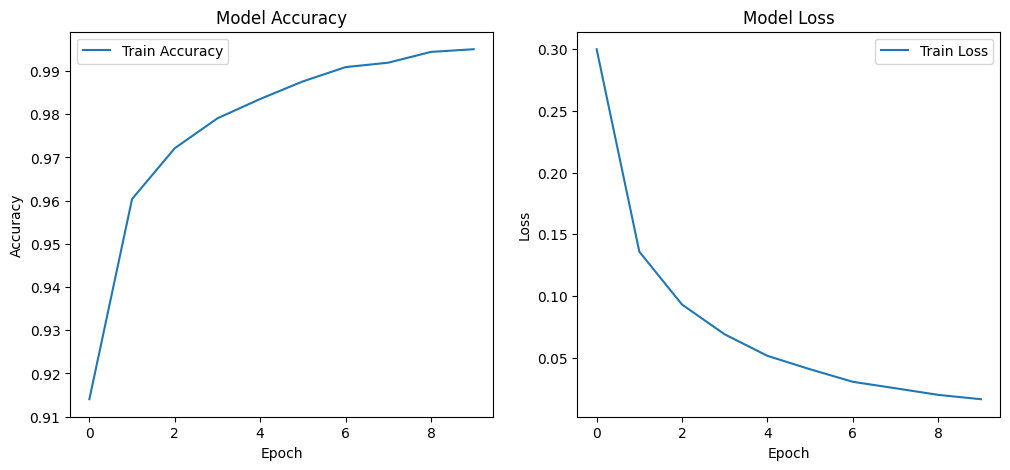

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
if has_labels:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
if has_labels:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

if has_labels:
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc:.4f}')